<a href="https://colab.research.google.com/github/NDsasuke/Decision-Trees/blob/main/DecisionTree_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np

In [87]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", skiprows=1, header=None, names=col_names)


In [88]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [89]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable


In [90]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [91]:
X_train.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
88,15,110,37.1,43,136,70,0.153
467,0,100,36.8,25,97,64,0.600
550,1,0,27.4,21,116,70,0.204
147,2,119,30.5,34,106,64,1.400
481,0,0,35.2,29,123,88,0.197


In [92]:
y_train.head()

88     1
467    0
550    0
147    0
481    0
Name: label, dtype: int64

In [93]:
X_test.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
285,7,135,26.0,51,136,74,0.647
101,1,0,26.1,22,151,60,0.179
581,6,0,25.0,27,109,60,0.206
352,3,0,34.4,46,61,82,0.243
726,1,180,36.1,25,116,78,0.496


In [94]:
X_test.head()

,pregnant,insulin,bmi,age,glucose,bp,pedigree
285,7,135,26.0,51,136,74,0.647
101,1,0,26.1,22,151,60,0.179
581,6,0,25.0,27,109,60,0.206
352,3,0,34.4,46,61,82,0.243
726,1,180,36.1,25,116,78,0.496


In [95]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [96]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.683982683982684


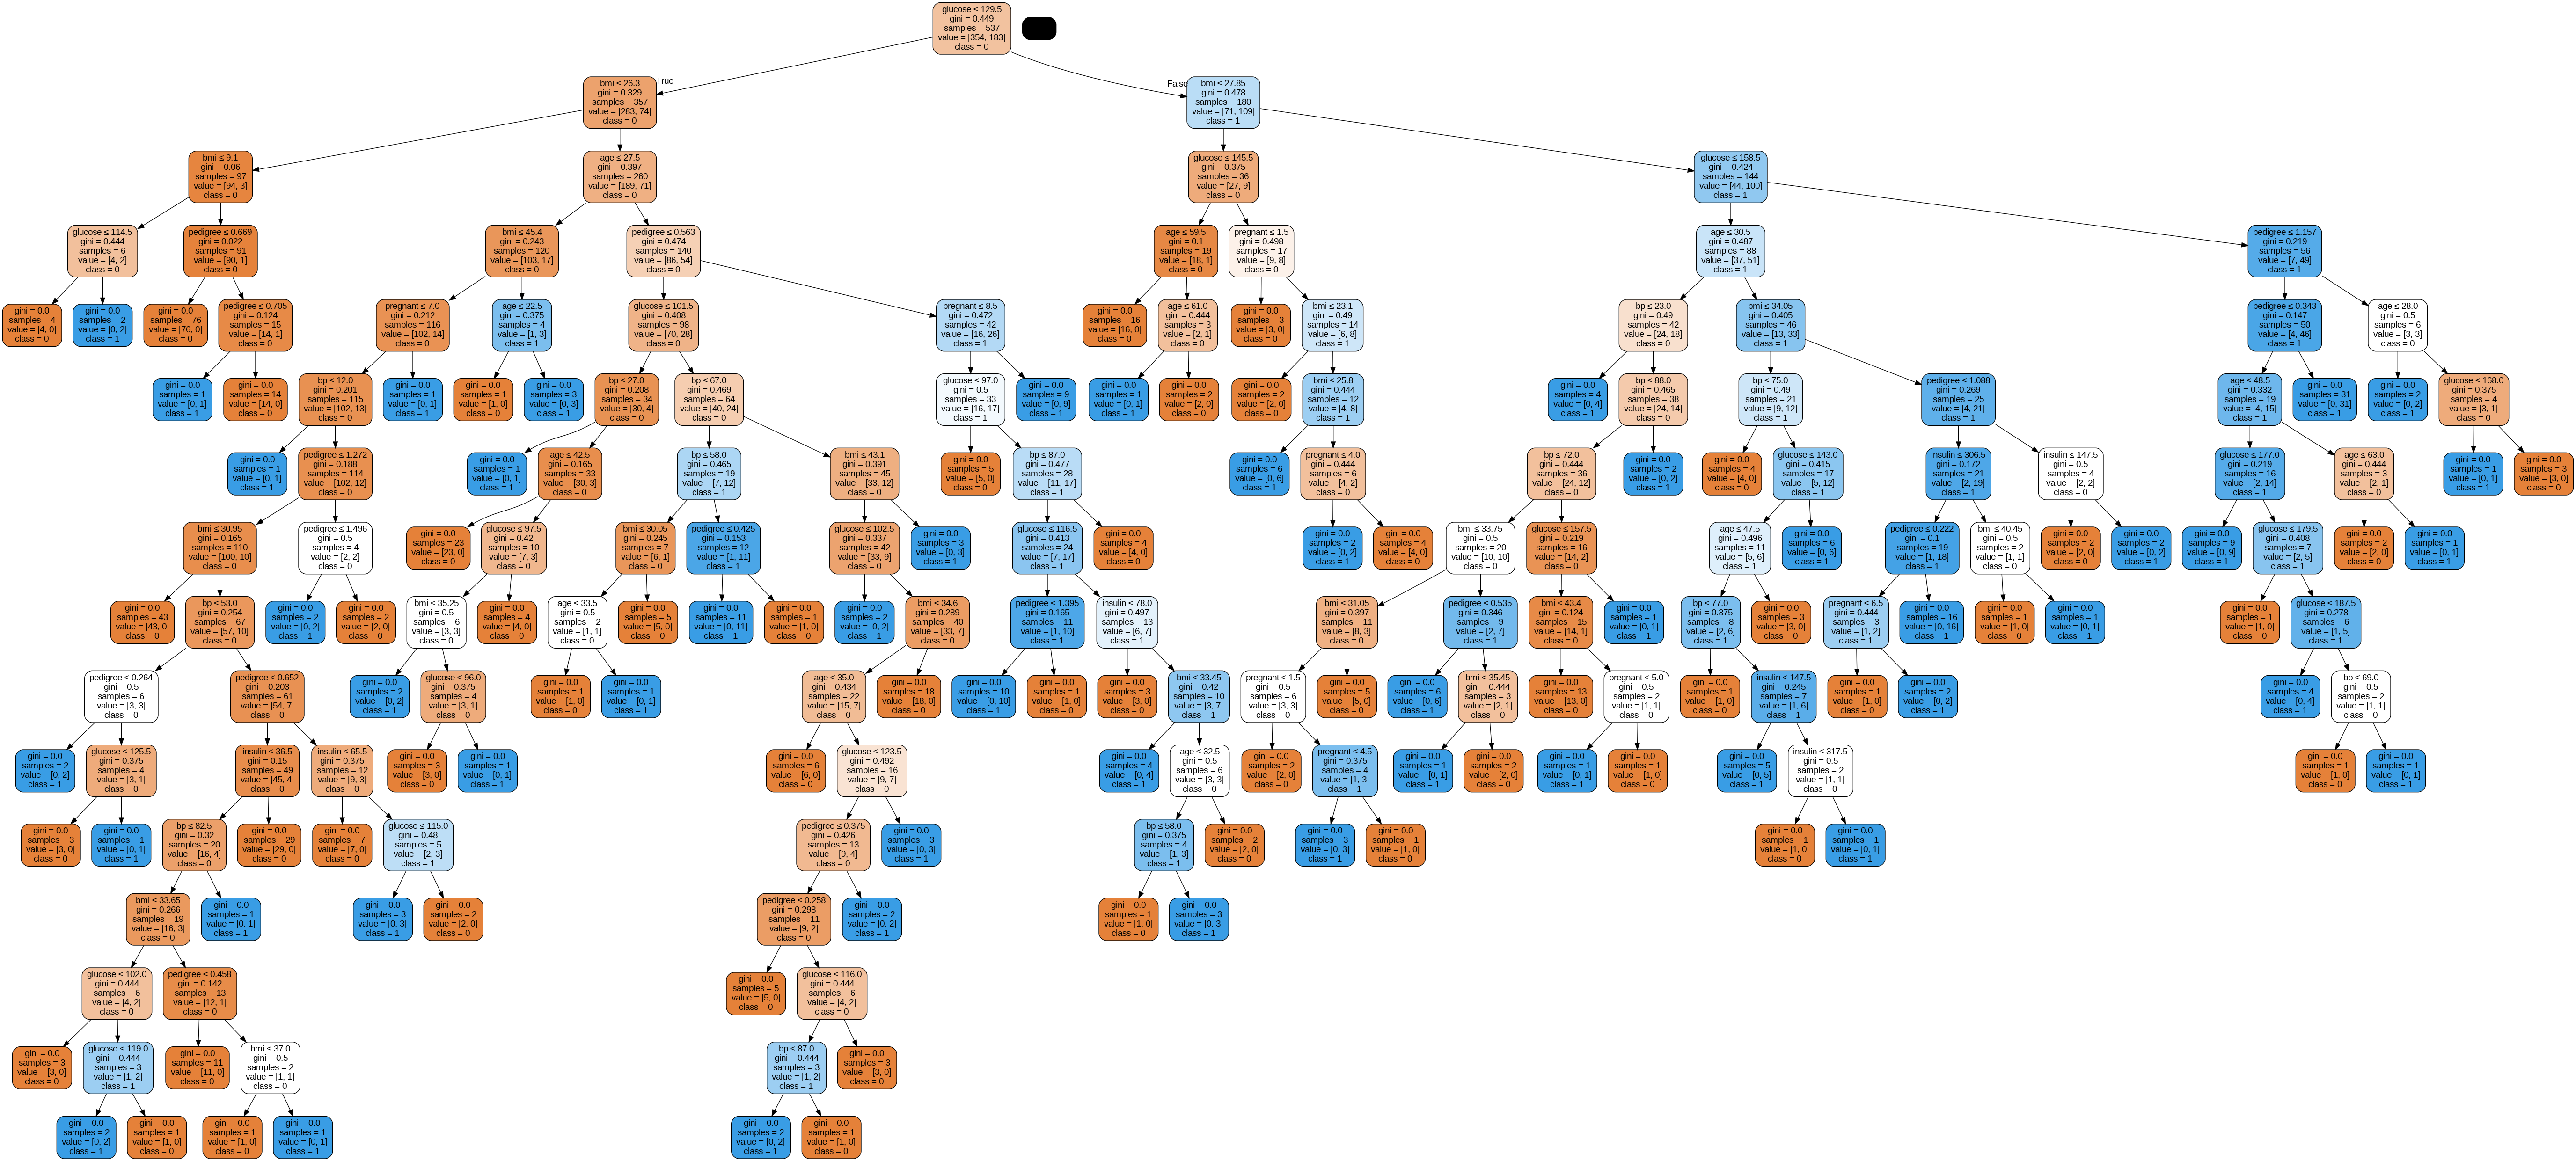

In [98]:
from sklearn.tree import export_graphviz
from io import StringIO  # Use Python's built-in `io` module
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())


In [99]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


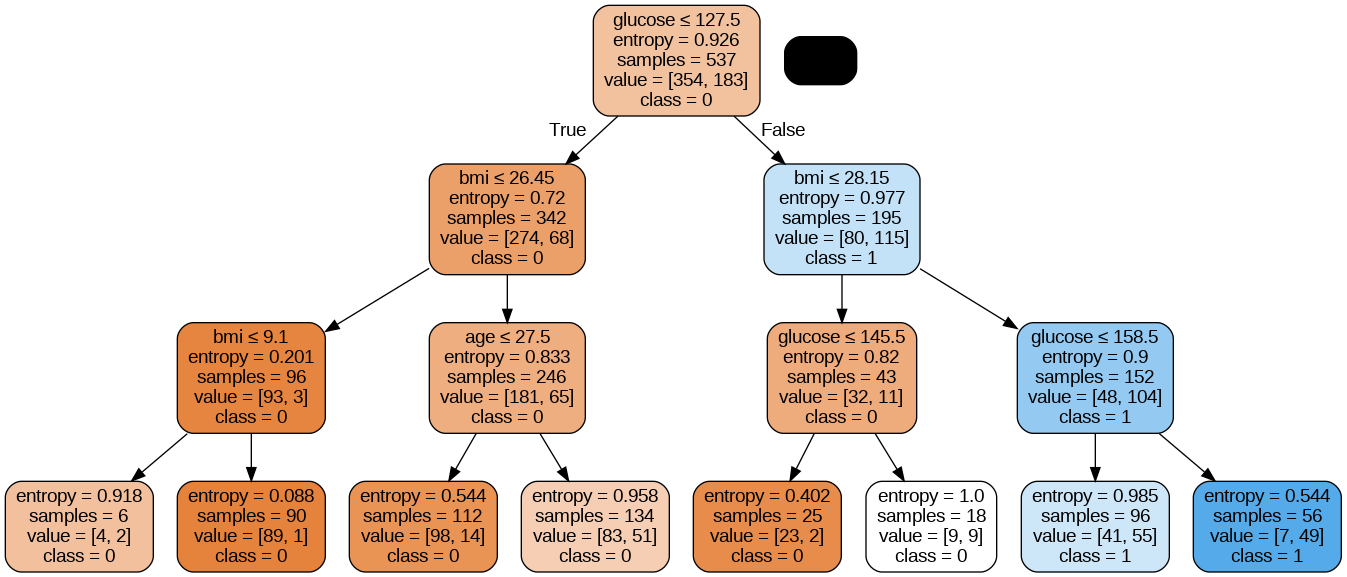

In [100]:
from sklearn.tree import export_graphviz
from io import StringIO  # Use Python's built-in `io` module
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())
